In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from inline_tensorboard import show_graph
from IPython.display import Image

In [2]:
sess = tf.InteractiveSession()

# Generate Data
Let's regenerate the same dataset.

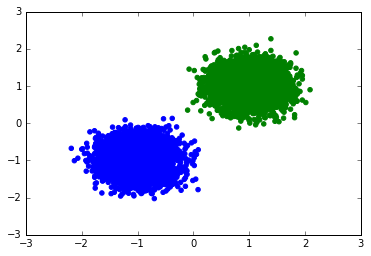

In [3]:
x11, x12 = np.random.multivariate_normal([1, 1], 0.1 * np.eye(2), 5000).T
x21, x22 = np.random.multivariate_normal([-1, -1], 0.1 * np.eye(2), 5000).T

x_ = np.array([np.concatenate([x11, x21]),
              np.concatenate([x12, x22])]).T
y_ = np.array([0] * 5000 + [1] * 5000)

plt.scatter(x_[:,0], x_[:,1], color=['g'] * 5000 + ['b'] * 5000)
plt.show()

# Initializers
You can use random initializations for the weights.

In [4]:
initializer = tf.random_uniform_initializer(minval=-np.sqrt(3), maxval=np.sqrt(3))

In [5]:
with tf.variable_scope('foo'):
    random_val = tf.get_variable("random_val", shape=tf.TensorShape([]), dtype=tf.float32, initializer=initializer)

In [6]:
random_val.initializer.run()
print random_val.eval()

-0.509371


You cannot redefine variables using `get_variable` once it has been defined.

In [7]:
with tf.variable_scope('foo'):
    try:
        random_val = tf.get_variable("random_val")
    except ValueError as e:
        print str(e).split('\n')[0]

Variable foo/random_val already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:


You can fetch the weights again. Useful for "weight sharing" across parts of a network.

In [8]:
with tf.variable_scope('foo'):
    tf.get_variable_scope().reuse_variables()
    new_random_val = tf.get_variable("random_val")

In [9]:
new_random_val.eval()

-0.50937057

# Building the network
We need to construct the network in such a way that it accepts batched inputs and produced a batched output.

In [10]:
x = tf.placeholder(tf.float32, shape=tf.TensorShape([None, 2]), name="input")
y = tf.placeholder(tf.float32, shape=tf.TensorShape([None]), name="input")

In [11]:
initializer = tf.random_uniform_initializer(minval=-np.sqrt(3), maxval=np.sqrt(3))

In [12]:
W = tf.get_variable("Weight",
                    shape=tf.TensorShape([2, 1]),
                    initializer=initializer,
                    dtype=tf.float32)

b = tf.get_variable("bias",
                    shape=tf.TensorShape([1]),
                    initializer=initializer,
                    dtype=tf.float32)

In [13]:
W.initializer.run()
b.initializer.run()

In [14]:
# Linear layer
h = tf.matmul(x, W) + b

# Non-linearity
prediction = tf.squeeze(tf.nn.sigmoid(h))

# Loss
loss = (prediction - y) ** 2

In [15]:
# Construct a "batch" of inputs
batch_indices = np.random.randint(0, 10000, size=64)

placeholder_values = {
    x: x_[batch_indices],
    y: y_[batch_indices]
}

In [16]:
print 'Shape of x:', np.shape(x_[batch_indices])
print 'Shape of y:', np.shape(y_[batch_indices])

Shape of x: (64, 2)
Shape of y: (64,)


In [17]:
print 'Shape of loss:', np.shape(loss.eval(placeholder_values))

Shape of loss: (64,)


# Training
No changes required.

In [18]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
optimize  = optimizer.minimize(loss)

In [19]:
loss_history = []

for _ in range(1000):
    batch_indices = np.random.randint(0, 10000, size=64)
    placeholder_values = {
        x: x_[batch_indices],
        y: y_[batch_indices]
    }
    
    optimize.run(placeholder_values)
    loss_history.append(np.mean(loss.eval(placeholder_values)))

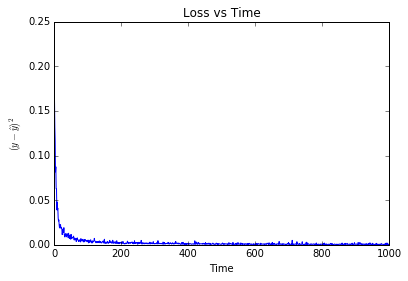

In [20]:
plt.plot(range(len(loss_history)), np.array(loss_history))
plt.xlabel('Time')
plt.ylabel('$(y - \hat{y}) ^ 2$')
plt.title('Loss vs Time')
plt.show()

In [21]:
results = []

for index in range(10000):
    placeholder_values = {
        x: np.expand_dims(x_[index], 0)
    }
    
    results.append(prediction.eval(placeholder_values))

In [22]:
print 'Correctly classified', np.count_nonzero(np.squeeze(np.round(results).astype(np.int32)) == y_), '/', len(y_)

Correctly classified 10000 / 10000
